# Table of Contents

### Contents:
- [Imports, reading in data](#Initial-Steps)
- [Choosing features](#Choosing-features)
- [Fitting the model](#Fitting-the-model)
- [Scoring and evaluating the model](#Scoring-and-evaluating-the-model)

This is the model where I hand pick columns I find redundant and drop them, then do the regression.

# Initial Steps

In [1]:
# imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in cleaned TRAIN data
train = pd.read_csv('../datasets/train_clean_no_dum.csv')

In [3]:
train.shape

(1556, 76)

In [4]:
# I want to play with the training data, I don't actually want to mess with it
# rerun this cell to get original data
df = train

In [5]:
# read in cleaned TEST data
test = pd.read_csv('../datasets/test_clean_no_dum.csv')

In [ ]:
test.shape

# Choosing features

#### By inspection, I decided that these were the columns most redundant:

- land contour and land slope*
- condition 1* and condition 2
- overall quality and overall condition (maybe should interact these two, THEN dummy)
- year built* and year remodeled
- roof style* and roof material (maybe should interact these two, THEN dummy oh wait, cant do that)
- exterior 1 and exterior 2*
- masonry veneer type and masonry veneer area*
- exterior quality* and exterior condition
- basement quality, condition, and exposure
- heating nominal
- basement full bath, basement half bath
- garage quality


In [10]:
cols_to_drop = ['land_slope',
                'condition_1', 
                'overall_qual',
                'year_built',
                'roof_style', 
                'exterior_2nd', 
                'mas_vnr_area',
                'exter_qual',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmt_full_bath',
                'bsmt_half_bath']

In [ ]:
cols_to_drop_d = []
for col in df.columns:
    for drop_col in cols_to_drop:
        if drop_col in col:
            cols_to_drop_d.append(col)

In [9]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'g

In [13]:
df.drop(columns = cols_to_drop, inplace = True)

In [22]:
def dummy_the_objects(df):
    non_numeric = df.select_dtypes('object')
    return pd.get_dummies(df, columns = non_numeric.columns, drop_first = True)

In [23]:
df_dum = dummy_the_objects(df)

In [24]:

X = df_dum.drop(columns = ['saleprice'])
y = df['saleprice']

In [25]:
features = X.columns

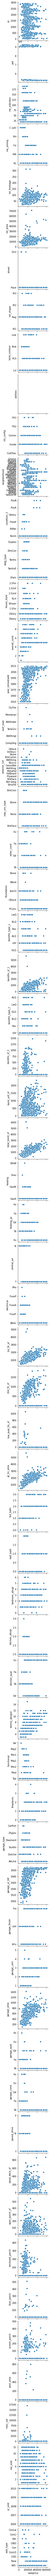

In [18]:
# let's look at the pairplots of the columns of interest against saleprice
sns.pairplot(df, y_vars=features, x_vars=['saleprice'])

# looks like a lot of the variables would do well with logistic regression instead



In [19]:
# let X be the numeric columns most strongly correlated to sale price
X = df[features]

# let y be the sale price, the goal output
y = df['saleprice']

In [ ]:
# save a copy of the official TEST dataset that has these same columns
test_mod_2 = test[features]
test_mod_2.to_csv('../datasets/test_mod_2.csv')

# Fitting the model

In [26]:
# split our data into train and test data to properly cross validate our model 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

In [27]:
# instantiate linear regression model and fit it to our data

lr = LinearRegression()
lr.fit(X_train, y_train)

# look at the coefficients and interpret them
pd.Series(lr.coef_, index = features)

id                    -7.141077
pid                    0.000015
ms_subclass         -251.137450
lot_frontage          74.620296
lot_area               1.987502
                       ...     
sale_type_ConLI    12384.028512
sale_type_ConLw     4121.128524
sale_type_New      21101.249869
sale_type_Oth      84549.604899
sale_type_WD        6636.386228
Length: 173, dtype: float64

# Scoring and evaluating the model

In [28]:
# scoring

print(f'The training score is: {lr.score(X_train, y_train)}')
print(f'The testing score is: {lr.score(X_test, y_test)}')
print(f'The cross validation score is: {cross_val_score(lr, X_train, y_train, cv=5).mean()}')

# Terrible, high variance


The training score is: 0.9339490927678826
The testing score is: 0.6023160060119968
The cross validation score is: 0.6598765689351087


In [29]:
# generate the predicted values
y_preds = lr.predict(X)

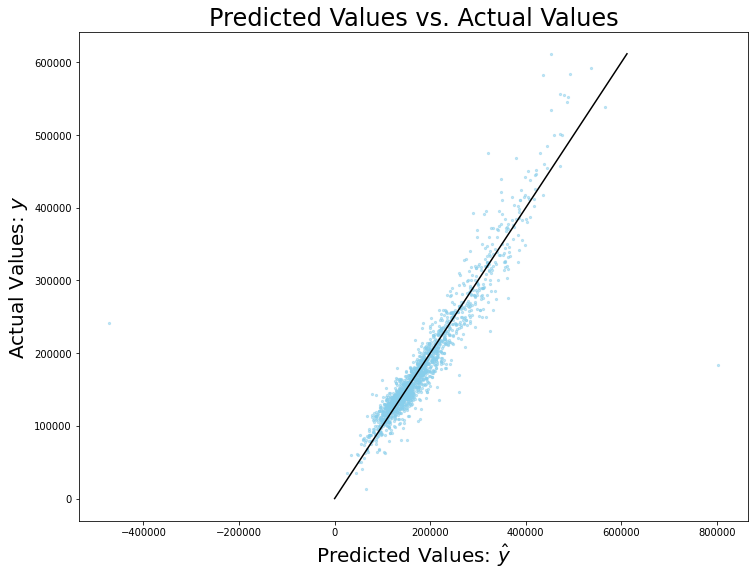

In [30]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

# looks like we might want to take the log

In [ ]:
lr.predict(test_mod_2)

In [ ]:
# let's submit this to kaggle

# this will go in the sale price column 
y_preds_test = lr.predict(test_mod_2)

submission = pd.DataFrame(y_preds_test, columns = ['SalePrice'])
submission['Id'] = test['id']

In [ ]:
submission.shape

In [ ]:
submission.to_csv('../datasets/submissions/sub_3.csv', index = False)

In [ ]:
# baseline model should be the mean of y
# look at april 2 notebook

# check the scores of the model with the mean
sub = pd.read_csv('../datasets/submissions/sub_3.csv')

In [ ]:
sub.shape

# Kaggle Score

this was submisssion 3 and the score was 31616.09775